## Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was
published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World
Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations
at an event celebrating International Day of Happiness on March 20th. The report continues to gain global
recognition as governments, organizations and civil society increasingly use happiness indicators to
inform their policy-making decisions. Leading experts across fields – economics, psychology, survey
analysis, national statistics, health, public policy and more – describe how measurements of well-being
can be used effectively to assess the progress of nations. The reports review the state of happiness in the
world today and show how the new science of happiness explains personal and national variations in
happiness.

## What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing
Dystopia is to have a benchmark against which all countries can be favorably compared (no country
performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar
to be of positive width. The lowest scores observed for the six key variables, therefore, characterize
Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life
expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as
“Dystopia,” in contrast to Utopia.

## What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six
variables either over- or under-explain average life evaluations. These residuals have an average value of
approximately zero over the whole set of countries.

## What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust
Government Corruption describe the extent to which these factors contribute in evaluating the happiness
in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the
unexplained value for each country.
The Dystopia Residual is already provided in the dataset.
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to
predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

## Dataset Link-
- https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
- https://github.com/dsrscientist/DSData

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Importing Necessary Libraries
</span>

</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier,ExtraTreesRegressor 
from xgboost import XGBRegressor

<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Loading Dataset
</span>

</font>

In [2]:
df = pd.read_csv("word_happiness.csv")

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#Rows and columns 
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 158   Number of columns: 12


### Renaming Columns name

In [5]:
df.rename(columns={'Happiness Rank': 'Happiness_Rank', 'Happiness Score': 'Happiness_Score','Standard Error': 'Standard_Error', 'Economy (GDP per Capita)': 'Economy_GDP_per_Capita','Health (Life Expectancy)': 'Health_Life_Expectancy', 'Trust (Government Corruption)': 'Trust_Government_Corruption','Dystopia Residual':'Dystopia_Residual'}, inplace=True)

In [6]:
df.head(2)

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


<font face="cursive" size="4">

<span style="background-color:rgb(255, 255, 0); padding: 10px;">
Exploratory Data Analysis
</span>

</font>

In [7]:
# Detail of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      158 non-null    object 
 1   Region                       158 non-null    object 
 2   Happiness_Rank               158 non-null    int64  
 3   Happiness_Score              158 non-null    float64
 4   Standard_Error               158 non-null    float64
 5   Economy_GDP_per_Capita       158 non-null    float64
 6   Family                       158 non-null    float64
 7   Health_Life_Expectancy       158 non-null    float64
 8   Freedom                      158 non-null    float64
 9   Trust_Government_Corruption  158 non-null    float64
 10  Generosity                   158 non-null    float64
 11  Dystopia_Residual            158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


Observation:
- There are no null values present in mt dataset
- there are 3 dtypes present in my dataset


In [8]:
# checking unique values
df.nunique()

Country                        158
Region                          10
Happiness_Rank                 157
Happiness_Score                157
Standard_Error                 153
Economy_GDP_per_Capita         158
Family                         158
Health_Life_Expectancy         157
Freedom                        158
Trust_Government_Corruption    157
Generosity                     158
Dystopia_Residual              158
dtype: int64

Observation:
 There are 10 unique values are present in region And outhers have 150+ unique values   

### separating Numerical and Categorical Columns

In [9]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()


print("Numerical Columns:")
print(numerical_columns)


print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
['Happiness_Rank', 'Happiness_Score', 'Standard_Error', 'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual']
Categorical Columns:
['Country', 'Region']


In [10]:
#value counts of region column
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [11]:
#checking null values in Dataset
df.isnull().sum()

Country                        0
Region                         0
Happiness_Rank                 0
Happiness_Score                0
Standard_Error                 0
Economy_GDP_per_Capita         0
Family                         0
Health_Life_Expectancy         0
Freedom                        0
Trust_Government_Corruption    0
Generosity                     0
Dystopia_Residual              0
dtype: int64

Observation:
There are no Null values present in dataset    

<AxesSubplot:>

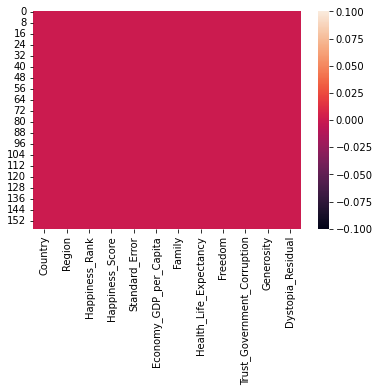

In [12]:
#heatmap of null values
sns.heatmap(df.isnull())

In [13]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [14]:
# General statistical description of Numerical variables
df.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


- The dataset consists of 158 observations or countries.

- The Happiness Rank ranges from 1 to 158, indicating the relative position of a country's happiness score compared to others.

- The Happiness Score ranges from 2.839 to 7.587, with a mean score of 5.375734. This score represents the overall happiness level of a country based on various factors.

- The Standard Error column represents the standard error of the happiness score estimation for each country. It has a mean value of 0.047885.

- The Economy (GDP per Capita) column ranges from 0 to 1.69042, with a mean of 0.846137. This indicates the country's GDP per capita, which is one of the factors contributing to happiness.

- The Family column ranges from 0 to 1.40223, with a mean of 0.991046. It represents the social support or strength of social relationships within a country.

- The Health (Life Expectancy) column ranges from 0 to 1.02525, with a mean of 0.630259. It indicates the life expectancy of individuals in each country, which is an important factor influencing happiness.

- The Freedom column ranges from 0 to 0.66973, with a mean of 0.428615. It measures the perceived level of freedom within a country.

- The Trust (Government Corruption) column ranges from 0 to 0.55191, with a mean of 0.143422. It represents the perception of government corruption within a country.

- The Generosity column ranges from 0 to 0.79588, with a mean of 0.237296. It indicates the charitable and generous behaviors of individuals within a country.

- The Dystopia Residual column ranges from 0.32858 to 3.60214, with a mean of 2.098977. It represents the extent to which the happiness score is influenced by factors not included in the dataset.

### Here i am creating a new column based on happyness score

In [15]:
# Create a list to store the predicted happiness category
happiness = []
for score in df['Happiness_Score']:
    if score < 4:
        happiness.append("UNHAPPY")
    elif score >= 4 and score <= 6:
        happiness.append("NORMAL")
    else:
        happiness.append("HAPPY")

# Create a new DataFrame for the predicted happiness category
pred_happiness = pd.DataFrame(happiness, columns=["Predicted_Happiness"])

# Convert the predicted happiness category to 'category' data type
pred_happiness = pred_happiness.astype('category')

# Concatenate the predicted happiness DataFrame with the main DataFrame
data = pd.concat([df, pred_happiness], axis=1)

In [16]:
# value counts
data['Predicted_Happiness'].value_counts()

NORMAL     93
HAPPY      44
UNHAPPY    21
Name: Predicted_Happiness, dtype: int64

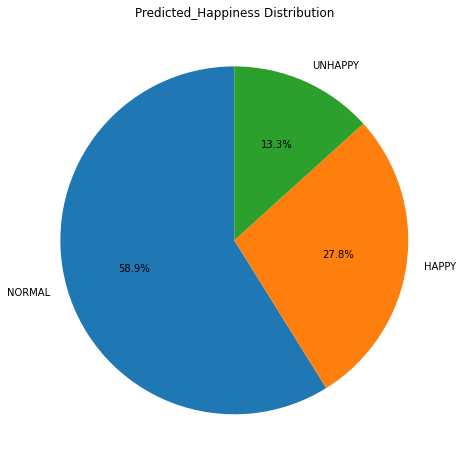

In [17]:
# Calculate the distribution of happiness scores
happiness_counts = data['Predicted_Happiness'].value_counts()

# Extract the unique happiness scores and their corresponding counts
happiness_scores = happiness_counts.index
happiness_counts = happiness_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(happiness_counts, labels=happiness_scores, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title('Predicted_Happiness Distribution')
plt.show()

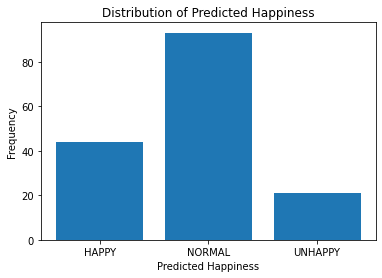

In [18]:
countries = data['Country']
predicted_happiness = data['Predicted_Happiness']
category_counts = {}
for happiness in predicted_happiness:
    if happiness not in category_counts:
        category_counts[happiness] = 0
    category_counts[happiness] += 1

# Prepare the data for plotting
categories = list(category_counts.keys())
frequencies = list(category_counts.values())

# Plot the histogram
plt.bar(categories, frequencies)

# Customize the plot
plt.xlabel('Predicted Happiness')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Happiness')
plt.show()

Observation:
- seeing pie plot and bar plot it is clear that the number of Normal Country is  highest    

### Here i am plotting bar plot for 5 happiest country 

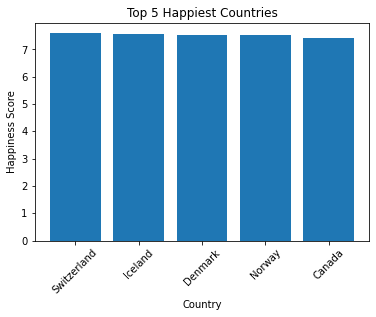

In [19]:
top_5_countries = data.sort_values('Happiness_Score', ascending=False).head(5)
plt.bar(top_5_countries['Country'], top_5_countries['Happiness_Score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries')
plt.xticks(rotation=45)
plt.show()


### Here i am ploting bar plot for 5 unhappy country based on their happyness score

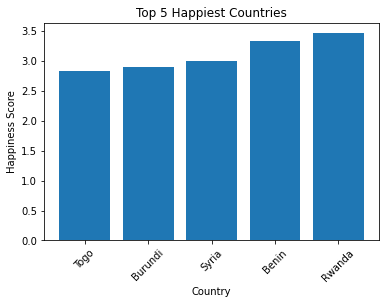

In [20]:
top_5_countries = data.sort_values('Happiness_Score', ascending=True).head(5)
plt.bar(top_5_countries['Country'], top_5_countries['Happiness_Score'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries')
plt.xticks(rotation=45)
plt.show()

### Dropping columns that are not contributing towards my label prediction

In [21]:
data = data.drop(['Country', 'Region', 'Happiness_Rank','Predicted_Happiness'], axis=1)

Observation:
- Here I have successfully removed the categorical columns 'Country','Predicted_Happiness' and 'Region' along with the 'Happiness Rank' which was just a list of sequential numeric data.

In [22]:
data.head(2)

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


### Pair plot

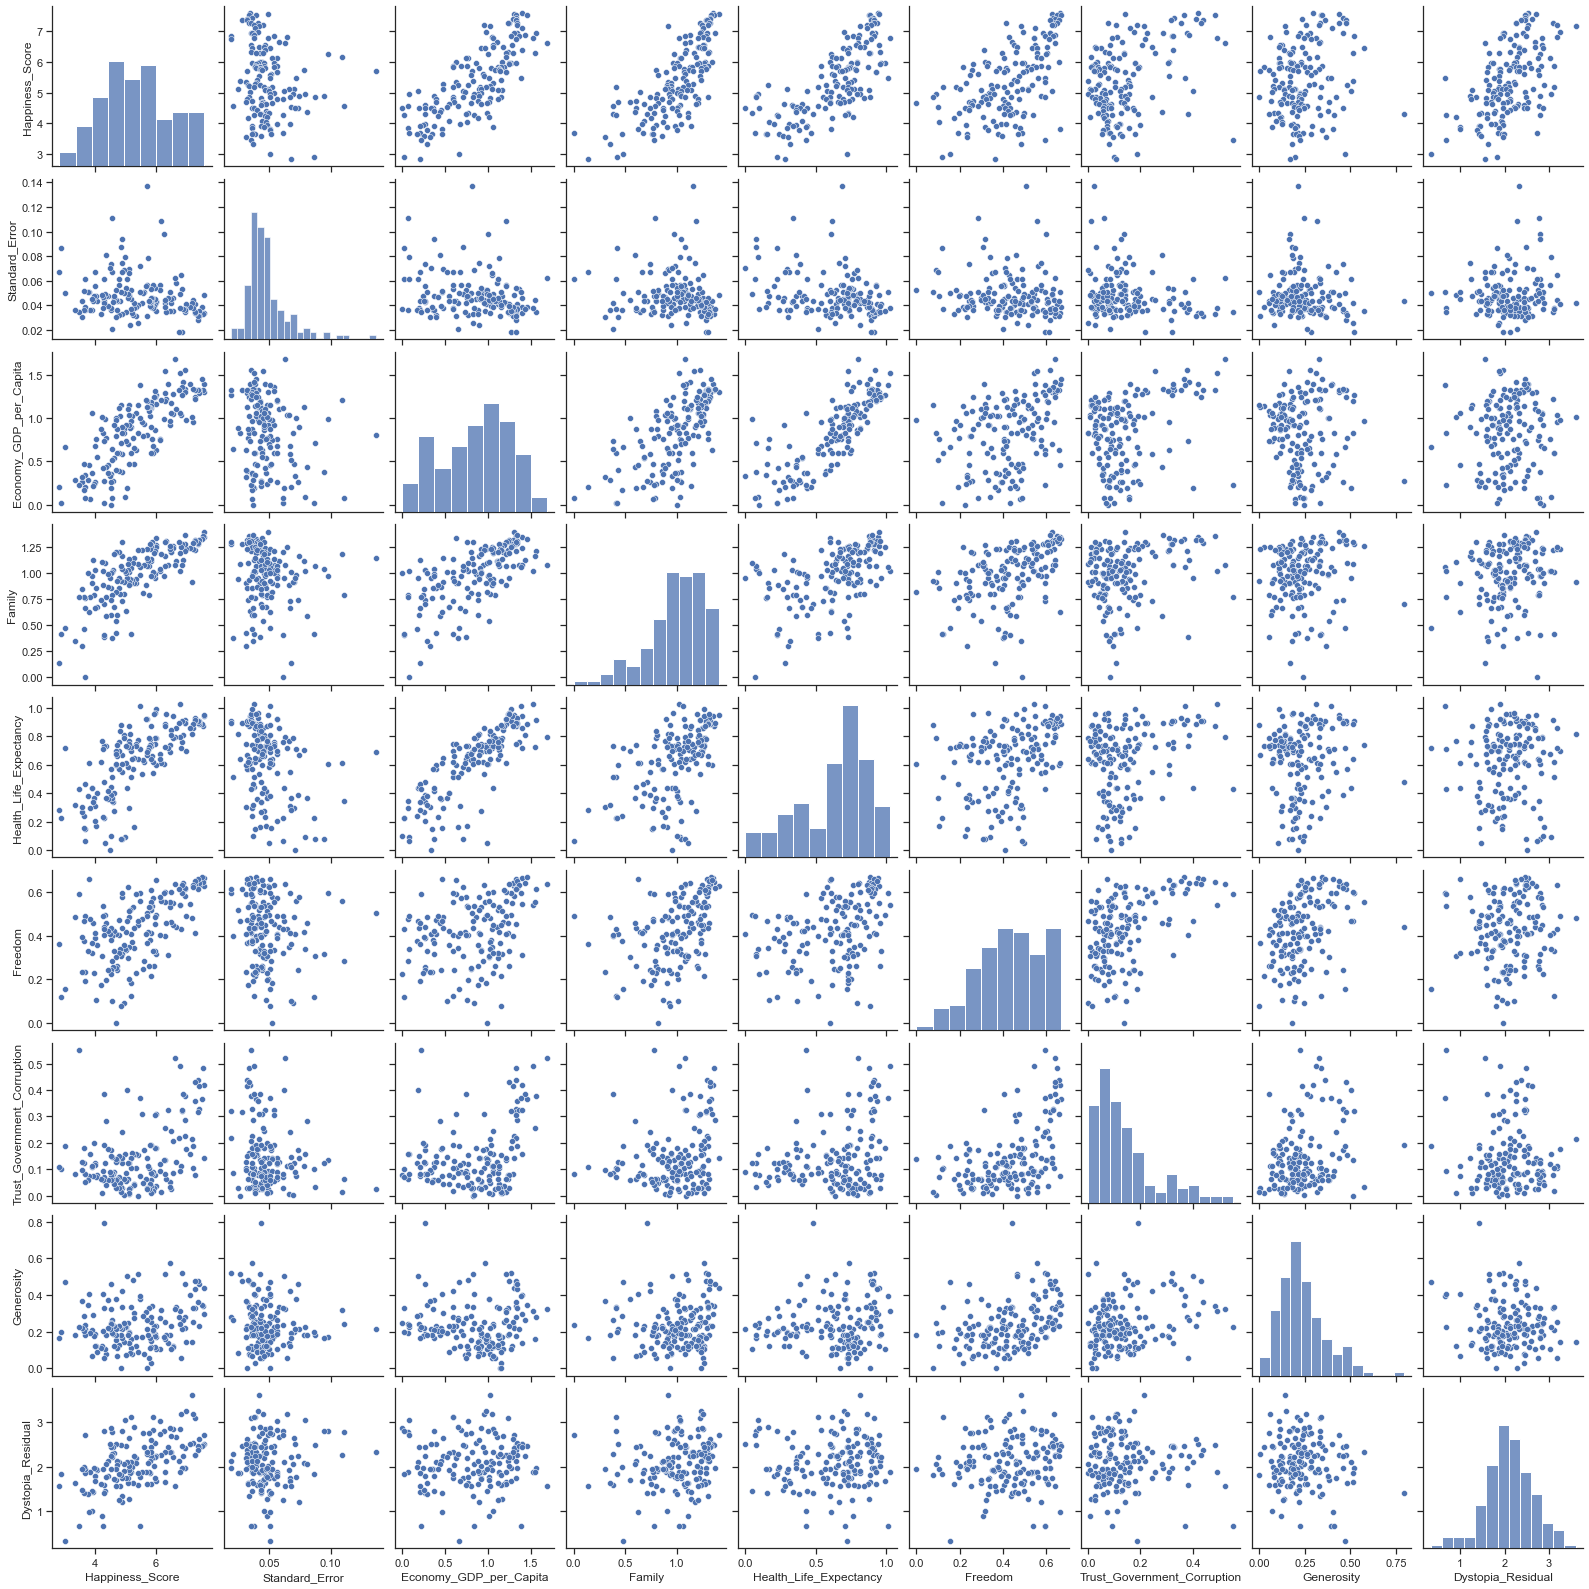

In [23]:
sns.set(style='ticks')
sns.pairplot(data,palette='hsv')
plt.show()

I used this pairplot basically to take a picturization on both scatter plot + histogram and see how the data distribution looks like. However the labels are quite tiny and I would also want to take a closer look at the skewness so going to extract the Histogram information.

### Using a Histogram

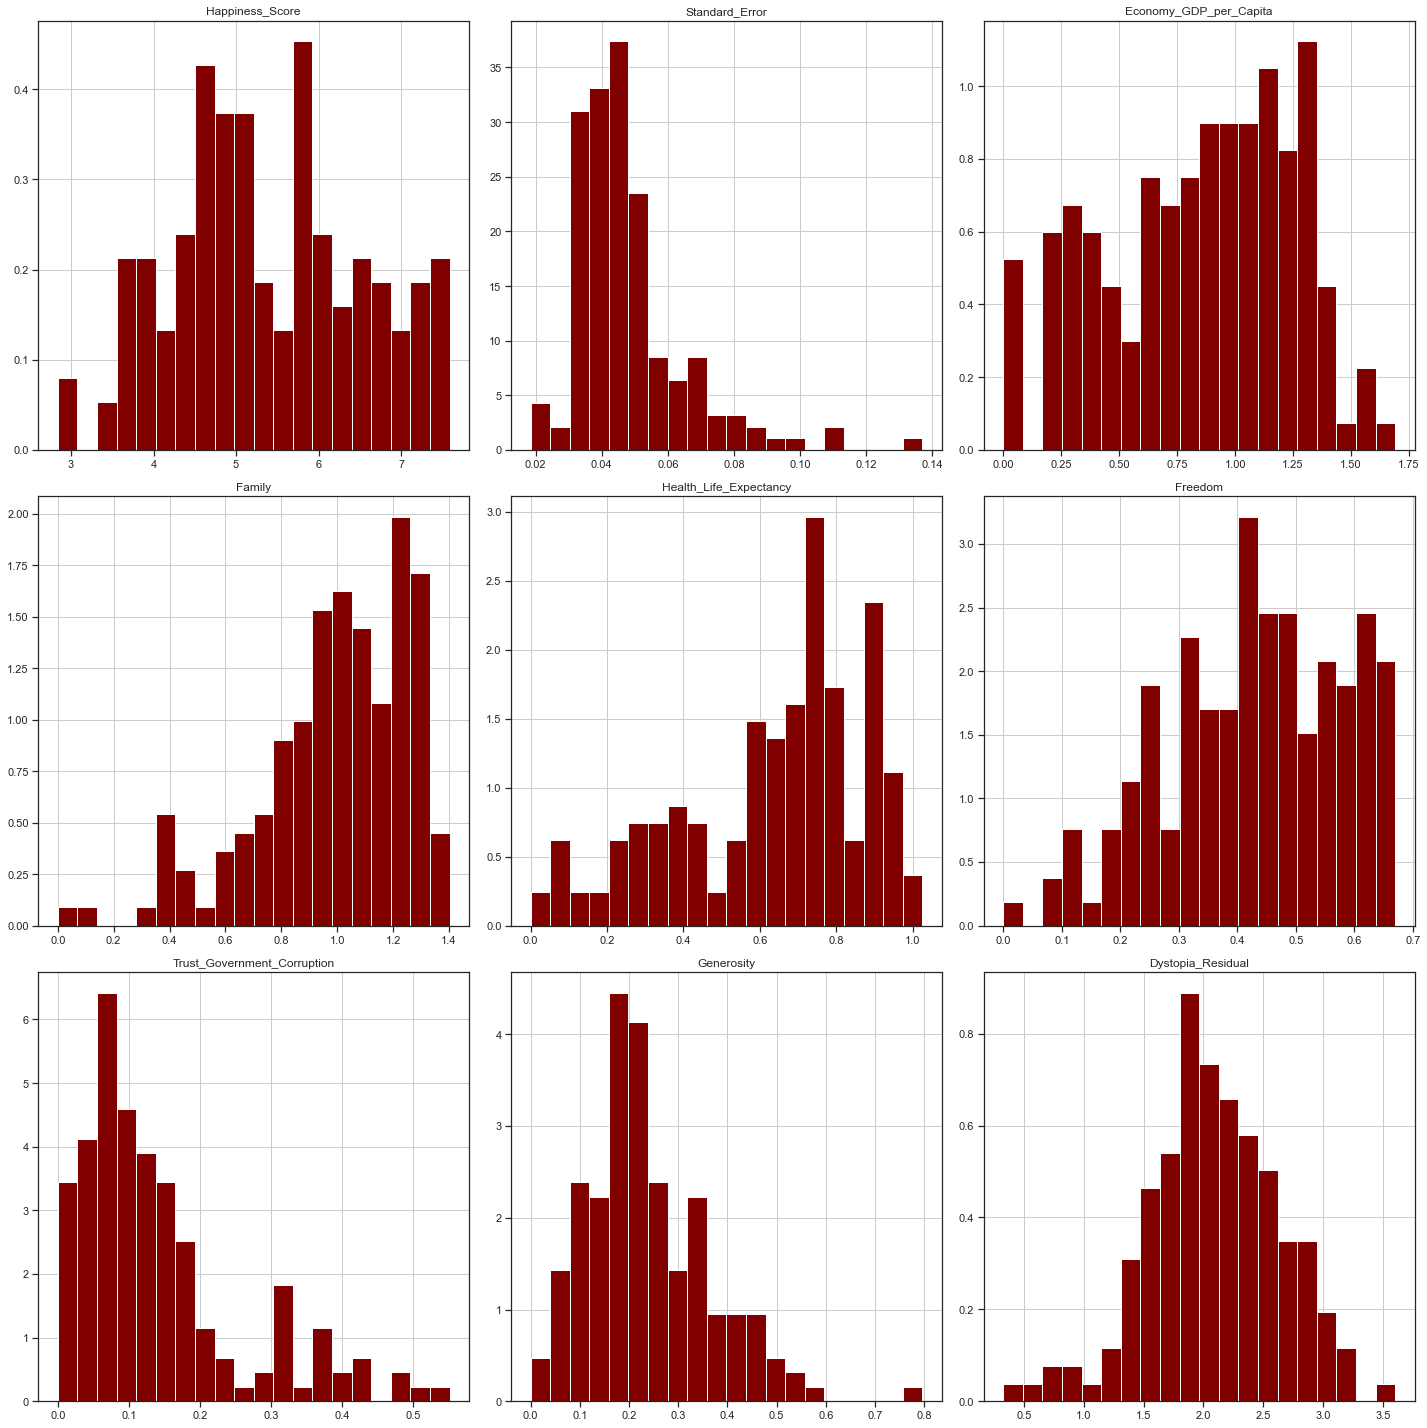

In [24]:
plt.rcParams['figure.figsize'] = (20,20)
data.hist(bins=20, color='maroon', density=True, label='Value', histtype='bar')
plt.tight_layout()
plt.show()

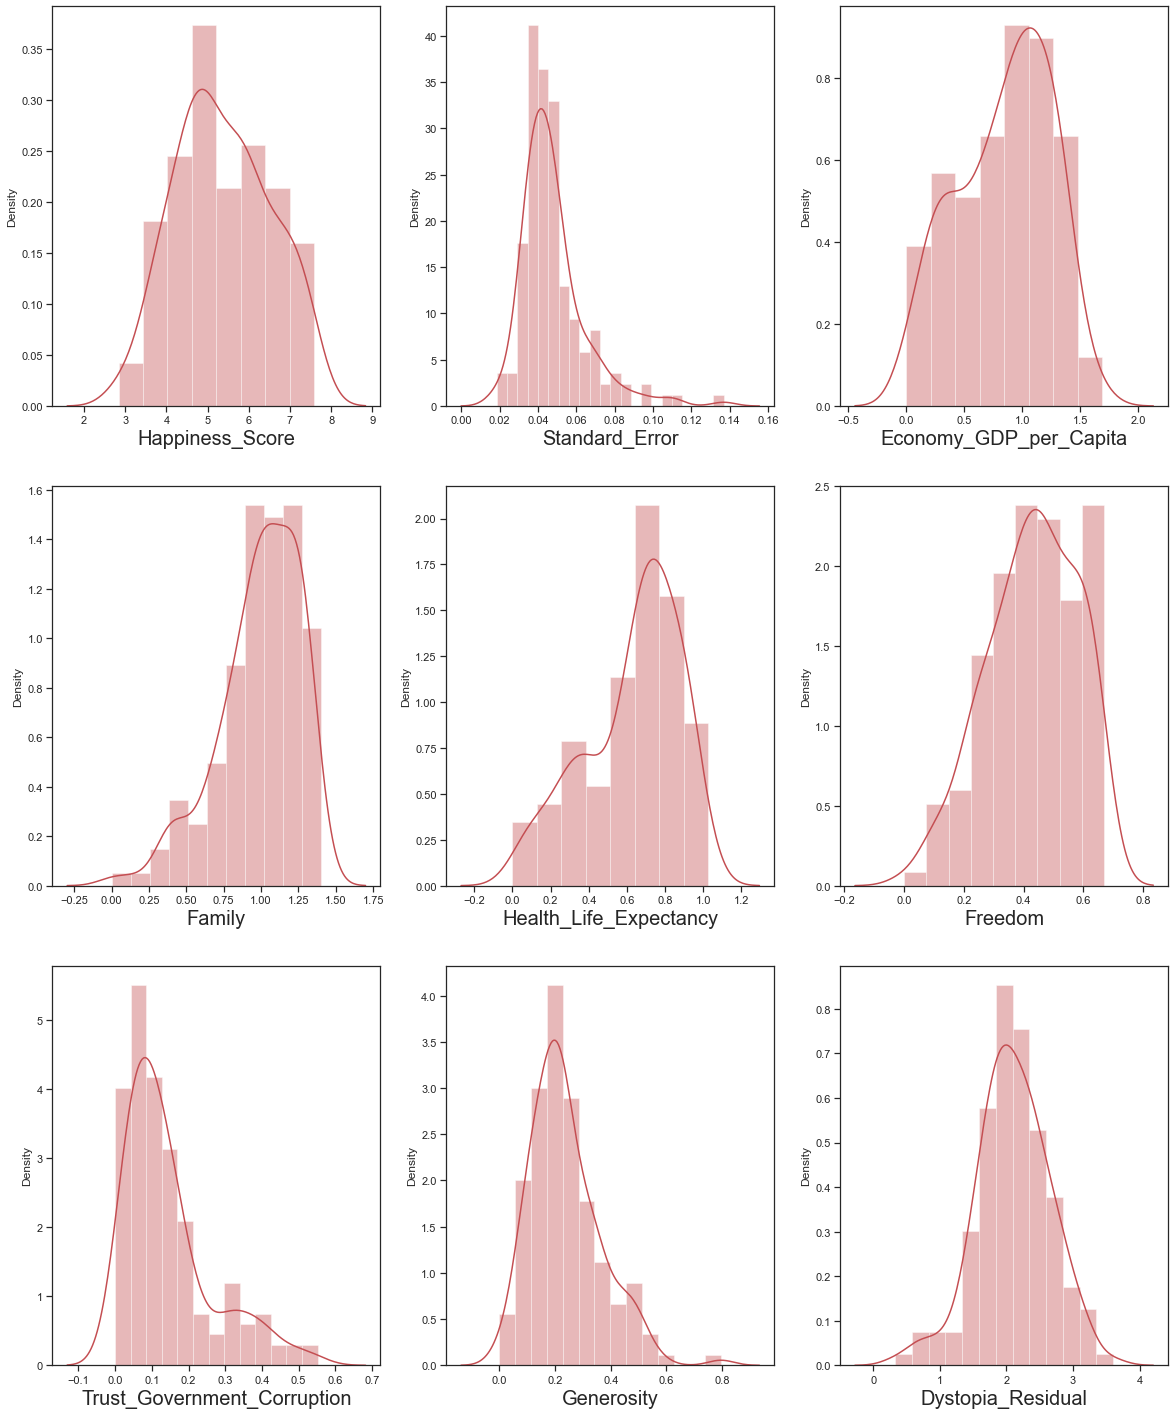

In [25]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in data.columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Taking a look at the above Histogram and distplot I can see that there are columns with skewness and are not normally distributed. But I will confirm the same using the skew function on the data set.

In [26]:
data.skew()

Happiness_Score                0.097769
Standard_Error                 1.983439
Economy_GDP_per_Capita        -0.317575
Family                        -1.006893
Health_Life_Expectancy        -0.705328
Freedom                       -0.413462
Trust_Government_Corruption    1.385463
Generosity                     1.001961
Dystopia_Residual             -0.238911
dtype: float64

Observation:



- Happiness_Score: The skewness value of 0.097769suggests a slightly positive skewness, indicating a slightly longer right tail.

- Standard_Error: The skewness value of 1.983439 indicates a significant positive skewness, suggesting a long right tail and a concentration of lower values.

- Economy_GDP_per_Capita: The skewness value of -0.317575 suggests a slightly negative skewness, indicating a slightly longer left tail.

- Family: The skewness value of -1.006893 indicates a significant negative skewness, suggesting a long left tail and a concentration of higher values.

- Health_Life_Expectancy: The skewness value of -0.705328 indicates a negative skewness, suggesting a longer left tail.

- Freedom: The skewness value of -0.413462 suggests a slightly negative skewness, indicating a slightly longer left tail.

- Trust_Government_Corruption: The skewness value of 1.385463 indicates a significant positive skewness, suggesting a long right tail and a concentration of lower values.

- Generosity: The skewness value of 1.001961 suggests a positive skewness, indicating a longer right tail.

- Dystopia_Residual: The skewness value of -0.238911 suggests a slightly negative skewness, indicating a slightly longer left tail.    

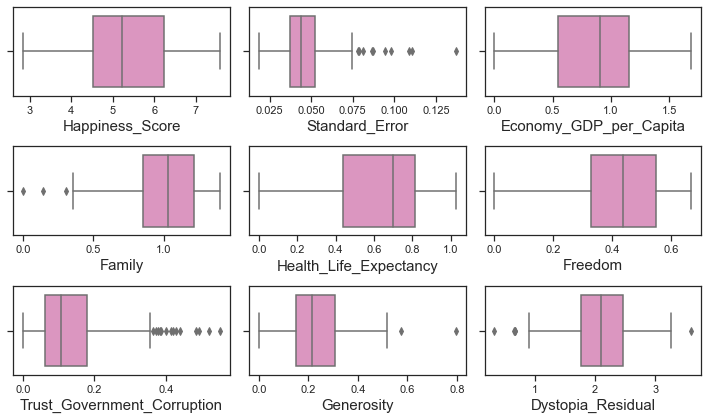

In [27]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in data.columns:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)

        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Observation:
- there are some outliers present in my dataset    

### Removing Outliers with the Help of Z score

In [28]:
# Z score method

z=np.abs(zscore(data))
threshold=3
np.where(z>3)

data1=data[(z<3).all(axis=1)]
data1

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


With the help of Z Score method we are able to detect the outliers and have removed them from our data set.

In [29]:
# Percentage of Data Loss

data_loss=(158-149)/158*100 # 158 was the number of rows in original data set and 149 after the removal of outliers
data_loss

5.69620253164557

After removing the outliers we are checking the data loss percentage by comparing the rows in our original data set and the new data set after removing the outliers.

In [30]:
data1.corr()

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
Happiness_Score,1.000000,-0.230252,0.773577,0.720868,0.729191,0.585066,0.477692,0.250903,0.528334
Standard_Error,-0.230252,1.000000,-0.251749,-0.137879,-0.356444,-0.186465,-0.140156,-0.131970,0.045722
Economy_GDP_per_Capita,0.773577,-0.251749,1.000000,0.628589,0.817470,0.376780,0.342269,0.020730,0.026936
Family,0.720868,-0.137879,0.628589,1.000000,0.503890,0.474229,0.258646,0.154011,0.118062
Health_Life_Expectancy,0.729191,-0.356444,0.817470,0.503890,1.000000,0.382595,0.270605,0.129328,0.031212
Freedom,0.585066,-0.186465,0.376780,0.474229,0.382595,1.000000,0.506373,0.428718,0.058596
Trust_Government_Corruption,0.477692,-0.140156,0.342269,0.258646,0.270605,0.506373,1.000000,0.296450,0.078080
Generosity,0.250903,-0.131970,0.020730,0.154011,0.129328,0.428718,0.296450,1.000000,-0.034239
Dystopia_Residual,0.528334,0.045722,0.026936,0.118062,0.031212,0.058596,0.078080,-0.034239,1.000000


Text(0.5, 1.0, 'Correlation Factors Heat Map')

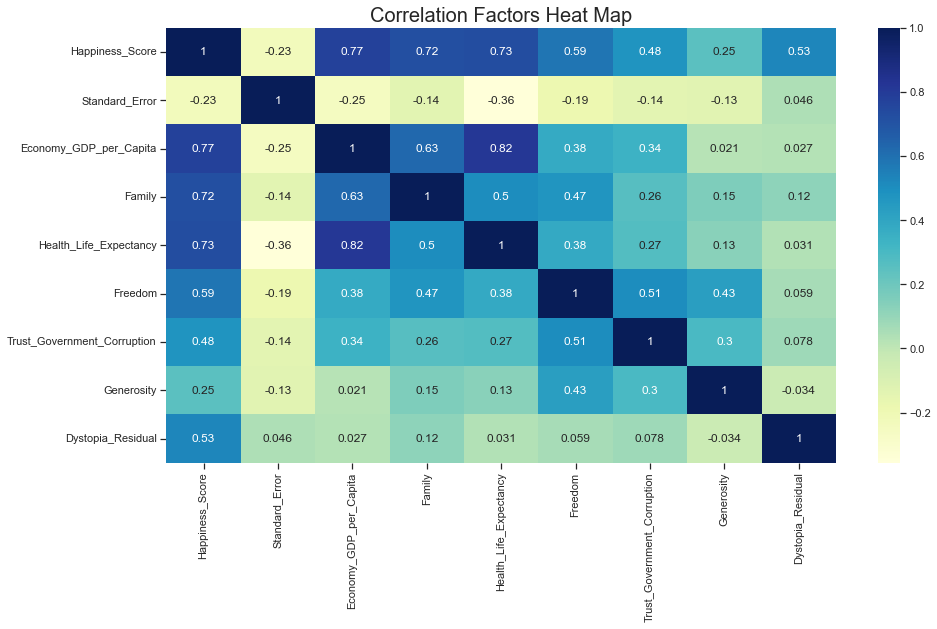

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

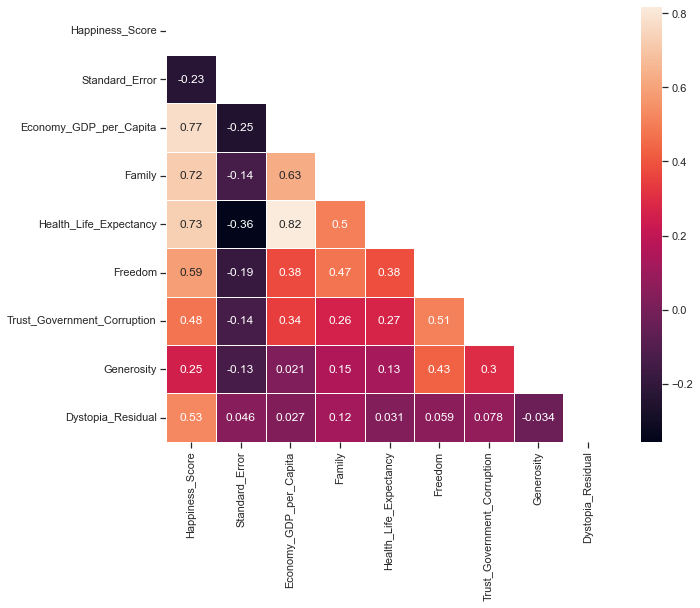

In [32]:
plt.figure(figsize=(10, 8))
matrix = np.triu(data1.corr())
sns.heatmap(data1.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");
plt.show()

In [33]:
correlation_with_label = data1.corr()['Happiness_Score'].abs().sort_values(ascending=False)
print(correlation_with_label)

Happiness_Score                1.000000
Economy_GDP_per_Capita         0.773577
Health_Life_Expectancy         0.729191
Family                         0.720868
Freedom                        0.585066
Dystopia_Residual              0.528334
Trust_Government_Corruption    0.477692
Generosity                     0.250903
Standard_Error                 0.230252
Name: Happiness_Score, dtype: float64


Observation:
- all the columns are highly correlated with label    

### Here i am checking features correlation with features 

In [34]:
df_corr = data1.corr()
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [35]:
features_to_drop

{'Health_Life_Expectancy'}

Observation:
- here it is clear that the Health_Life_Expectancy is highly (more than 80 %) correlated with Economy_GDP_per_Capita so we will drop Health_Life_Expectancy

In [36]:
data1 = data1.drop(['Health_Life_Expectancy'], axis=1)

In [37]:
data1.head(2)

,Happiness_Score,Standard_Error,Economy_GDP_per_Capita,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201


### Spliting into feature and label

In [38]:
X = data1.drop('Happiness_Score', axis=1) # List of all features
y = data1['Happiness_Score'] # Data of our label

In [39]:
X

,Standard_Error,Economy_GDP_per_Capita,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328


In [40]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness_Score, Length: 149, dtype: float64

In [41]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Standard_Error,Economy_GDP_per_Capita,Family,Freedom,Trust_Government_Corruption,Generosity,Dystopia_Residual
0,-0.866786,1.381916,1.357879,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,0.379439,-0.533653,-0.409226,-0.930702


### Checking Best Random State

In [42]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state=i)
    gb=GradientBoostingRegressor(n_estimators=100)
    gb.fit(X_train,y_train)
    y_pred=gb.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9630942714270214 on Random_state 97


### Train Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=22)

### Linear Regression

In [44]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.977028987088247
MAE 0.11840451349001997


here accuracy is 97.70 % i can say that the model may be overfitted 

### Best fit line for linear regression

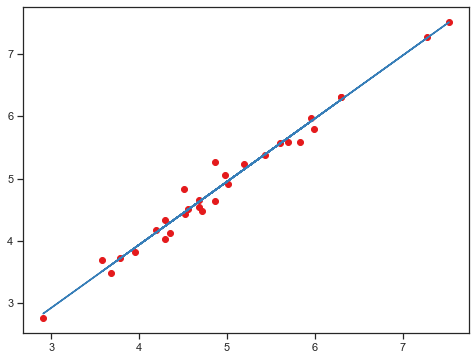

In [45]:
plt.rcParams['figure.figsize'] = (8, 6)
palette = "Set1"
sns.set_palette(palette)

plt.plot(y_test, y_pred, 'o')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m * y_test + b)

plt.show()

### Ridge Regression

In [46]:
R = Ridge(alpha=10)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9808651285156372
MAE 0.106934396059336


here accuracy is 98.08% so i can say that the model may be overfitted 

### Lasso Regression

In [47]:
L = Lasso(alpha=0.001)
L.fit(X_train,y_train)
y_pred = L.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9772055246867738
MAE 0.11752038374312784


here R2_score  is 97.72% so i can say that the model may be overfitted 

### Decision Tree Regressor

In [48]:
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.719847471094097
MAE 0.4549860370370371


In [49]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(DT, out_file=None, feature_names=X.columns)

# Visualize the decision tree
graph = graphviz.Source(dot_data)

# Set the graph size
graph.format = 'png'
graph.filename = 'decision_tree'
graph.render(view=True)

'decision_tree.png'

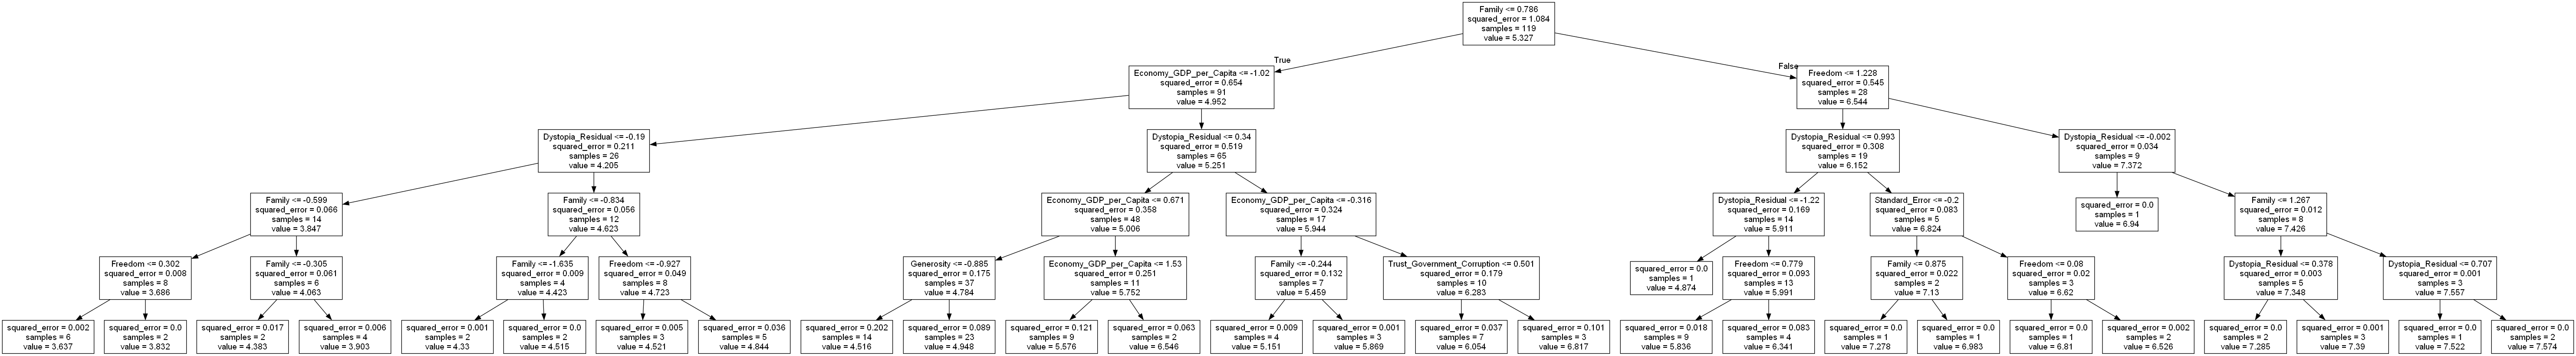

### Random Forest Regressor

In [50]:

RF = RandomForestRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.75,
                             max_features=0.75,
                             max_depth=10)
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8639502487024552
MAE 0.3028976791005297


### Extra Tree Regressor

In [51]:

ET = ExtraTreesRegressor(n_estimators=100,
                             random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=10,
                           bootstrap=True)

ET.fit(X_train,y_train)
y_pred = ET.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.861391711250951
MAE 0.30412815277777816


### Ada Boost Regressor

In [52]:
AB = AdaBoostRegressor(n_estimators=100,learning_rate=1.0)
AB.fit(X_train,y_train)
y_pred = AB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.8485185839838203
MAE 0.32857124057651294


### Gradient Boosting Regressor

In [53]:
GB = GradientBoostingRegressor(n_estimators=100)
GB.fit(X_train,y_train)
y_pred = GB.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9475656195427877
MAE 0.18617917806265802


### XGB Regressor

In [54]:
XG = XGBRegressor(n_estimators=50,max_depth=3,learning_rate=0.1)
XG.fit(X_train,y_train)
y_pred = XG.predict(X_test)
print('R2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2_score 0.9284159122253902
MAE 0.21146769154866538


### DataFrame of all The models

In [55]:

# Define the models
models = {
    'Linear Regression': LR,
    'Ridge': R,
    'Lasso': L,
    'Decision Tree':DT,
    'Random Forest': RF,
    'Extra Trees': ET,
    'AdaBoost': AB,
    'Gradient Boosting': GB,
    'XGBoost': XG
}

# Create an empty dataframe
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'MAE'])

# Iterate over each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate R2 score and MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the results to the dataframe
    results_df = results_df.append({'Model': model_name, 'R2 Score': r2, 'MAE': mae}, ignore_index=True)
    results_df_sorted = results_df.sort_values('R2 Score',ascending=False)

In [56]:
results_df_sorted

,Model,R2 Score,MAE
1,Ridge,0.980865,0.106934
2,Lasso,0.977206,0.11752
0,Linear Regression,0.977029,0.118405
7,Gradient Boosting,0.948336,0.185633
8,XGBoost,0.928416,0.211468
4,Random Forest,0.86395,0.302898
5,Extra Trees,0.861392,0.304128
6,AdaBoost,0.829014,0.33658
3,Decision Tree,0.706514,0.462619


```
Here i can say that 'Linear Regression', 'Lasso', 'Ridge' are looking overfitted so the 'Gradient Boosting ' is the best model we will save it for further prediction.
```

### Feature Importance

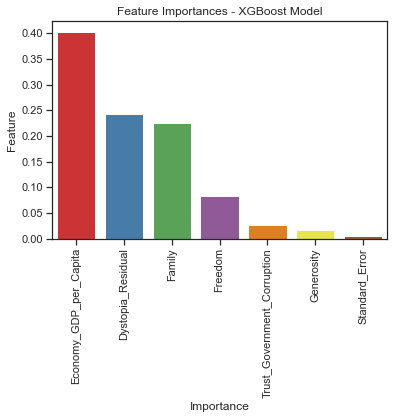

In [57]:
# Train the XGBoost model (I have already trained and named it 'XG')
GB.fit(X_train, y_train)

# Get feature importances
importances = GB.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to hold feature importance data
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(6,4))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances - XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()

Observation:
- here we can see the importance of the feature in prediction    

### saving best model

In [58]:
filename = 'GradientBoosting.pkl'
pickle.dump(GB, open(filename, 'wb'))

# The end